In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [8]:
df = pd.read_csv('dataset.csv')
df

,total_duration,esteem_sco,social,ent,uti,game,sfd,result,no_of_messages,no_of_calls,call_duration
0,0.336069,1.000000,0.219995,0.010971,0.057883,0.247872,0.016577,1,0.057692,0.303226,0.401083
1,0.813918,0.833333,0.630602,0.107763,0.042677,0.000000,0.337055,1,0.740385,0.267742,0.182916
2,0.448994,1.000000,0.193951,0.363262,0.022152,0.000000,0.120765,1,0.826923,0.000000,0.000000
3,0.585425,0.833333,0.281815,0.417976,0.060604,0.000000,0.000043,1,0.375000,0.087097,0.005615
4,0.771027,0.833333,0.504567,0.295383,0.082652,0.000000,0.000581,1,0.144231,0.154839,0.147411
5,0.445430,0.666667,0.283818,0.084985,0.116730,0.000000,0.530555,1,0.769231,0.329032,0.275311
6,0.672613,1.000000,0.492040,0.146640,0.096381,0.000000,0.035658,0,0.846154,0.335484,0.408060
7,0.134293,0.833333,0.093084,0.053002,0.019022,0.000000,0.028720,0,0.028846,0.225806,0.698769
8,0.677757,0.833333,0.308292,0.285785,0.054130,0.432145,0.257820,1,0.528846,0.306452,0.306534
9,0.474553,1.000000,0.168580,0.173093,0.150682,0.476242,0.027399,1,0.826923,0.474194,0.295616


In [9]:
train = df.drop(labels=['no_of_calls', 'call_duration', 'uti'], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('result',axis=1), train['result'], test_size=0.20, 
                                                    random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [13]:
print(y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 1 0 1 1]
Accuracy: 0.8


In [14]:
train_pred = clf.predict(X_train)
print(train_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1]


In [15]:
print(metrics.accuracy_score(y_train, train_pred))

1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


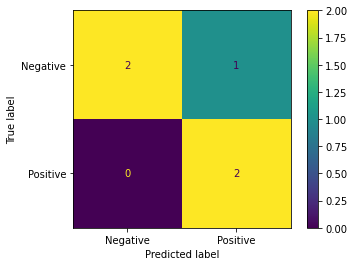

In [16]:
metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels=['Negative', 'Positive'])